# Customer Behavior Analytics & Predictive Insights  
## A Data Mining Project on E-Commerce Transactions

---

## Project Overview

This project aims to analyze customer purchasing behavior and generate predictive insights using a real-world e-commerce dataset. Core data mining techniques applied include:

- Data cleaning and preprocessing  
- Exploratory Data Analysis (EDA)  
- Association Rule Mining for identifying co-purchase patterns  
- Classification algorithms to predict customer behavior  
- Clustering for customer segmentation  
- Evaluation of models and business recommendations

Our objective is to extract actionable insights that can aid decision-making in marketing, inventory management, and customer engagement strategies.

---

## Dataset Introduction

We are using the "Online Retail Dataset" sourced from Kaggle, which contains over 540,000 transactions recorded between 2010 and 2011 by a UK-based online retailer.

### Dataset Highlights:
- Number of records: 541,909  
- Number of features: 8  
- Types of data:  
  - Numerical: Quantity, UnitPrice  
  - Categorical: Country, StockCode, Description  
  - Temporal: InvoiceDate  
  - Customer identification: CustomerID  

This dataset satisfies all the project requirements: it is real-world, sufficiently large, and includes both categorical and numerical attributes necessary for comprehensive data mining.

---

## Group Members

| Student ID | Name                  |
|------------|-----------------------|
| 2022327    | Abdullah Mustafa      |
| 2022360    | Muhammad Bilal        |
| 2022684    | Muhammad Umer Sami    |
| 2022380    | Hamza Motiwala        |

Each member has actively contributed to different components of the analysis and report preparation.

---

**Note:**  
The following code block installs any required Python libraries. Please run it before executing the rest of the notebook to ensure all dependencies are available.


In [ ]:
# Core Data Analysis Libraries
!pip install pandas numpy

# Visualization Libraries (Static + Interactive)
!pip install matplotlib seaborn plotly

# Machine Learning & Preprocessing
!pip install scikit-learn

# Association Rule Mining
!pip install mlxtend

# Graph Visualization
!pip install networkx

# System & Styling (for enhanced plots/fonts, optional)
!pip install matplotlib-fontconfig  # For better font control, optional


## Data Preprocessing

We begin by loading the dataset from a CSV file into a pandas DataFrame. Initial inspection reveals that some rows are missing a `CustomerID`, which is essential for identifying unique customers — such rows are dropped.

Other preprocessing steps include:
- Removing rows with **negative or zero quantities or unit prices**, as these are likely to represent returns, errors, or irrelevant transactions.
- Converting the `InvoiceDate` column to datetime format for temporal analysis.
- Creating a new feature: `TotalPrice = Quantity × UnitPrice` to represent the value of each transaction.
- Encoding categorical variables such as `Country` using label encoding or one-hot encoding as needed for modeling.

These steps ensure the data is clean, consistent, and ready for analysis and modeling.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [5]:
#Reading the dataset
df = pd.read_csv("dataset.csv", encoding="ISO-8859-1")

# Dropping Null
df.dropna(subset=["CustomerID"], inplace=True)

# Fixing Faulty Columns
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Feature Engineering
# 1: TotalSpend
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
customer_spend = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_spend.columns = ['CustomerID', 'TotalSpend']

# 2: High Spender label 
median_spend = customer_spend['TotalSpend'].median()
customer_spend['HighSpender'] = (customer_spend['TotalSpend'] > median_spend).astype(int)

# 3: Frequency (number of purchases per customer)
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name='Frequency')

# 4: Average quantity purchased per customer
avg_quantity = df.groupby('CustomerID')['Quantity'].mean().reset_index(name='AvgQuantity')

# 5: Merge all engineered features
ml_df = customer_spend.merge(frequency, on='CustomerID').merge(avg_quantity, on='CustomerID')

# Label Encoding
le = LabelEncoder()
df['CountryEncoded'] = le.fit_transform(df['Country'])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,CountryEncoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,35
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,35


## Exploratory Data Analysis (EDA)

In this step, we explore key patterns and trends in the data:

- **Data Overview:** Summary statistics and missing value checks to understand the dataset structure.
- **Top Countries by Transactions:** Highlighting the most active countries (excluding the UK for clearer international insight).
- **Sales Over Time:** Monthly sales trends reveal seasonality and performance spikes.
- **Popular Products:** Identifying the most purchased items by total quantity.
- **Transaction Value Distribution:** Visualizing how much customers typically spend per invoice.

These insights help us better understand customer behavior before applying data mining techniques.


In [8]:
#Dataset Info
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       397884 non-null  object        
 1   StockCode       397884 non-null  object        
 2   Description     397884 non-null  object        
 3   Quantity        397884 non-null  int64         
 4   InvoiceDate     397884 non-null  datetime64[ns]
 5   UnitPrice       397884 non-null  float64       
 6   CustomerID      397884 non-null  float64       
 7   Country         397884 non-null  object        
 8   TotalPrice      397884 non-null  float64       
 9   CountryEncoded  397884 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(4)
memory usage: 31.9+ MB

Summary Statistics:


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,CountryEncoded
count,397884.000000,397884,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000,32.846998
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000,35.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000,35.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000,35.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000,36.000000
std,179.331775,NaN,22.097877,1713.141560,309.071041,6.710717


In [10]:
# Missing Value Info
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
TotalPrice        0
CountryEncoded    0
dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_17064\3372878107.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


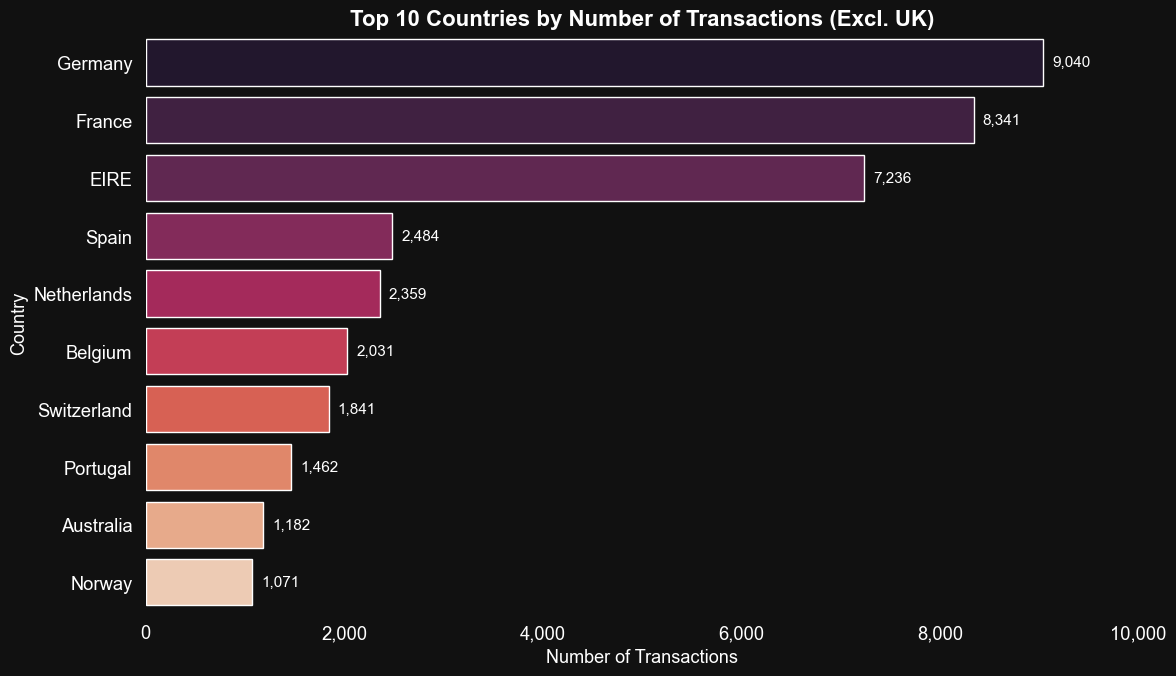

In [12]:


# Set dark theme
sns.set_theme(style="dark", rc={
    'axes.facecolor': '#111111',
    'figure.facecolor': '#111111',
    'axes.edgecolor': 'white',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#333333',
    'font.family': 'sans-serif',
}, font_scale=1.2)

# Get top 10 countries by number of transactions (excluding UK)
top_countries = df[df['Country'] != 'United Kingdom']['Country'].value_counts().head(10)

# Generate a dark color palette
bar_colors = sns.color_palette("rocket", len(top_countries))

# Create the figure
plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_countries.values, 
    y=top_countries.index, 
    palette=bar_colors
)

# Add value labels to bars
for i, v in enumerate(top_countries.values):
    plt.text(v + max(top_countries.values) * 0.01, i, f'{v:,}', va='center', fontsize=11, color='white')

# Customize plot appearance
plt.title('Top 10 Countries by Number of Transactions (Excl. UK)', fontsize=16, weight='bold', color='white')
plt.xlabel('Number of Transactions', fontsize=13, color='white')
plt.ylabel('Country', fontsize=13, color='white')
plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x):,}' for x in plt.xticks()[0]], color='white')
plt.yticks(color='white')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


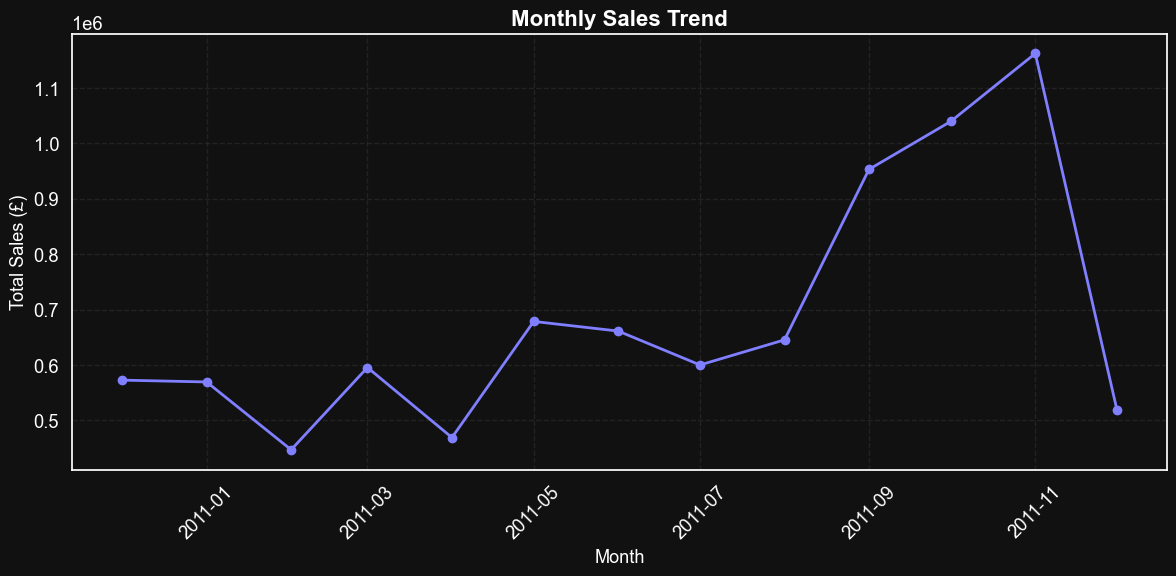

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure dark theme settings are applied
sns.set_theme(style="dark", rc={
    'axes.facecolor': '#111111',
    'figure.facecolor': '#111111',
    'axes.edgecolor': 'white',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#333333',
    'font.family': 'sans-serif',
}, font_scale=1.2)

# Monthly sales trend
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

# Convert PeriodIndex to datetime for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_sales.index, 
    monthly_sales.values, 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    color=sns.color_palette("cool", 1)[0]
)

# Enhancements
plt.title('Monthly Sales Trend', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=13)
plt.ylabel('Total Sales (£)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 3- Month Rolling average 

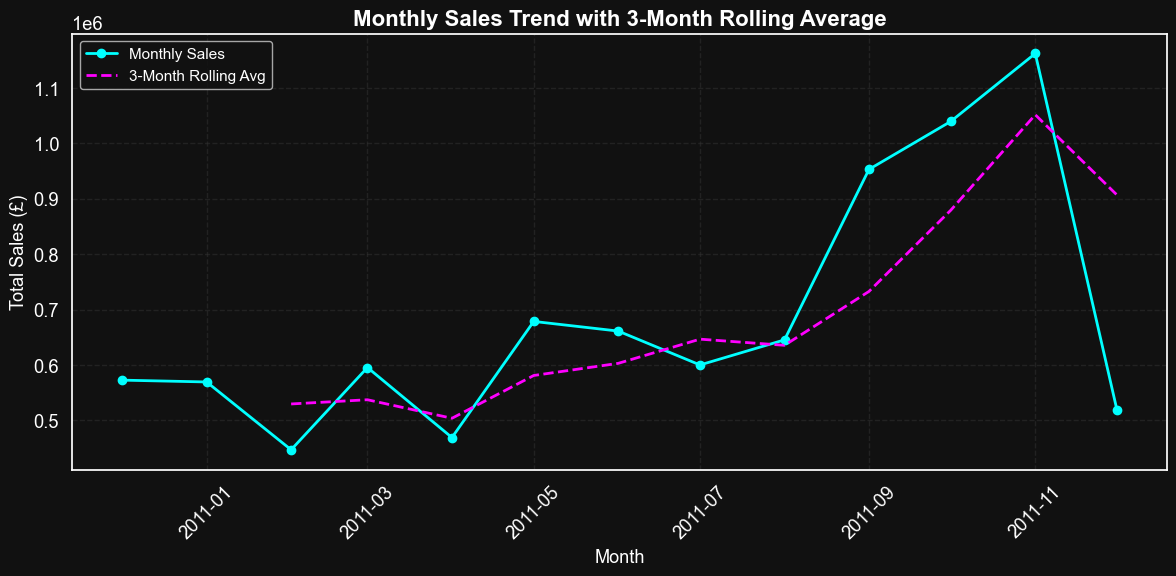

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark theme
sns.set_theme(style="dark", rc={
    'axes.facecolor': '#111111',
    'figure.facecolor': '#111111',
    'axes.edgecolor': 'white',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#333333',
    'font.family': 'sans-serif',
}, font_scale=1.2)

# Prepare data
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

# Calculate 3-month rolling average
rolling_avg = monthly_sales.rolling(window=3).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', linewidth=2, 
         color='cyan', label='Monthly Sales')
plt.plot(rolling_avg.index, rolling_avg.values, linestyle='--', linewidth=2, 
         color='magenta', label='3-Month Rolling Avg')

# Customize appearance
plt.title('Monthly Sales Trend with 3-Month Rolling Average', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=13)
plt.ylabel('Total Sales (£)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=11)
plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_17064\3543304864.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


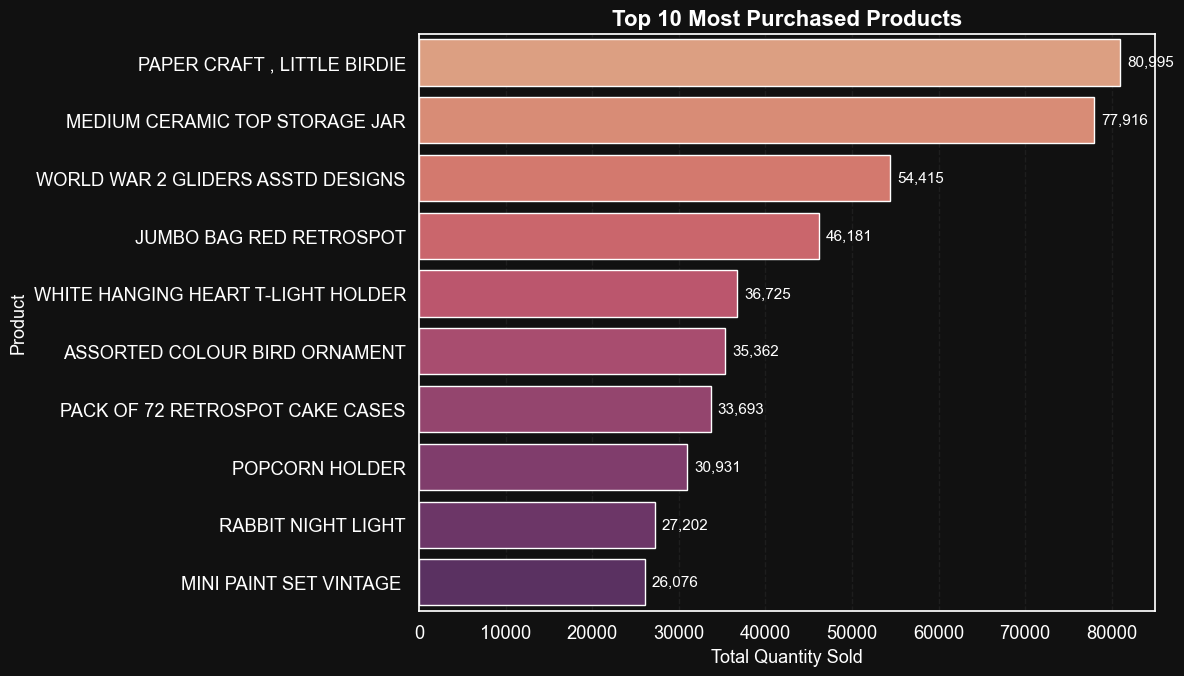

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark theme
sns.set_theme(style="dark", rc={
    'axes.facecolor': '#111111',
    'figure.facecolor': '#111111',
    'axes.edgecolor': 'white',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#333333',
    'font.family': 'sans-serif',
}, font_scale=1.2)

# Top selling products
top_items = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Generate figure
plt.figure(figsize=(12, 7))
bar_colors = sns.color_palette('flare', len(top_items))

sns.barplot(
    x=top_items.values,
    y=top_items.index,
    palette=bar_colors
)

# Add value labels
for i, v in enumerate(top_items.values):
    plt.text(v + max(top_items.values) * 0.01, i, f'{v:,}', va='center', fontsize=11, color='white')

# Customize appearance
plt.title('Top 10 Most Purchased Products', fontsize=16, weight='bold')
plt.xlabel('Total Quantity Sold', fontsize=13)
plt.ylabel('Product', fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


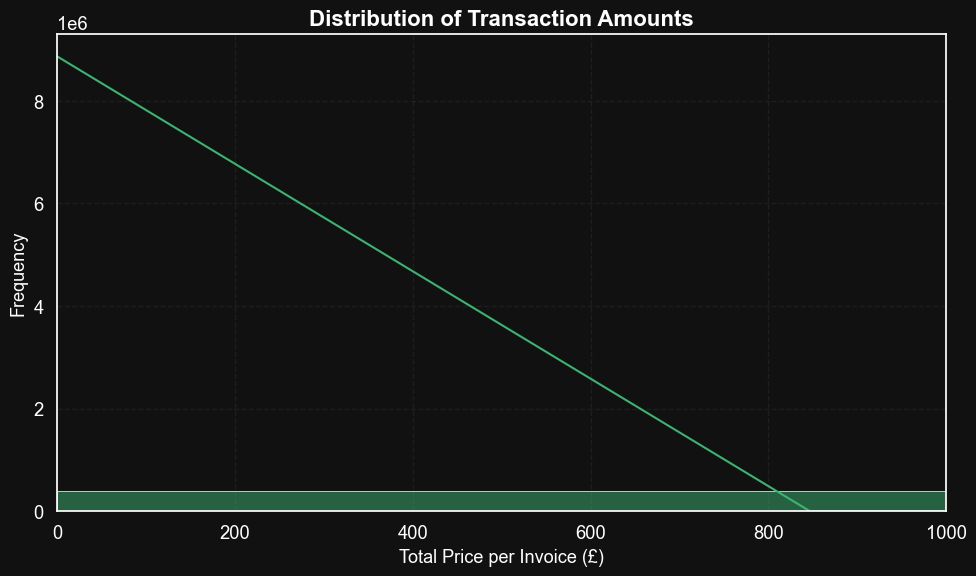

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark theme
sns.set_theme(style="dark", rc={
    'axes.facecolor': '#111111',
    'figure.facecolor': '#111111',
    'axes.edgecolor': 'white',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#333333',
    'font.family': 'sans-serif',
}, font_scale=1.2)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPrice'], bins=100, color='mediumseagreen', kde=True, edgecolor=None)

# Limit x-axis to avoid distortion from outliers
plt.xlim(0, 1000)

# Labels and formatting
plt.title('Distribution of Transaction Amounts', fontsize=16, weight='bold')
plt.xlabel('Total Price per Invoice (£)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Association Rule Mining

In this step, we uncover co-purchase patterns using market basket analysis. By applying the Apriori algorithm, we identify frequent itemsets and generate association rules that reveal which products are commonly bought together. These insights help businesses improve product bundling and cross-selling strategies.


In [50]:
# Step 1: Filter positive transactions from a single country
basket = df[(df['Quantity'] > 0) & (df['Country'] == 'Germany')]

# Step 2: Keep top 50 most frequent items
top_items = basket['Description'].value_counts().nlargest(50).index
basket = basket[basket['Description'].isin(top_items)]

# Step 3: Create basket matrix
basket_grouped = basket.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Step 4: Binary encode
basket_encoded = basket_grouped.applymap(lambda x: 1 if x > 0 else 0)


C:\Users\dell\AppData\Local\Temp\ipykernel_17064\2343574679.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket_grouped.applymap(lambda x: 1 if x > 0 else 0)


In [52]:
# Step 5: Run Apriori
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(basket_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Step 6: Show top rules
rules_sorted = rules.sort_values(by='lift', ascending=False).head(5)
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                               antecedents                        consequents  \
95           (RED RETROSPOT CHARLOTTE BAG)  (WOODLAND CHARLOTTE BAG, POSTAGE)   
90       (WOODLAND CHARLOTTE BAG, POSTAGE)      (RED RETROSPOT CHARLOTTE BAG)   
54                (WOODLAND CHARLOTTE BAG)      (RED RETROSPOT CHARLOTTE BAG)   
55           (RED RETROSPOT CHARLOTTE BAG)           (WOODLAND CHARLOTTE BAG)   
92  (POSTAGE, RED RETROSPOT CHARLOTTE BAG)           (WOODLAND CHARLOTTE BAG)   

     support  confidence      lift  
95  0.058275    0.781250  6.323703  
90  0.058275    0.471698  6.323703  
54  0.062937    0.465517  6.240841  
55  0.062937    0.843750  6.240841  
92  0.058275    0.833333  6.163793  


D:\DOWNLOADS\anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## Top 5 Rules

C:\Users\dell\AppData\Local\Temp\ipykernel_17064\1634833740.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


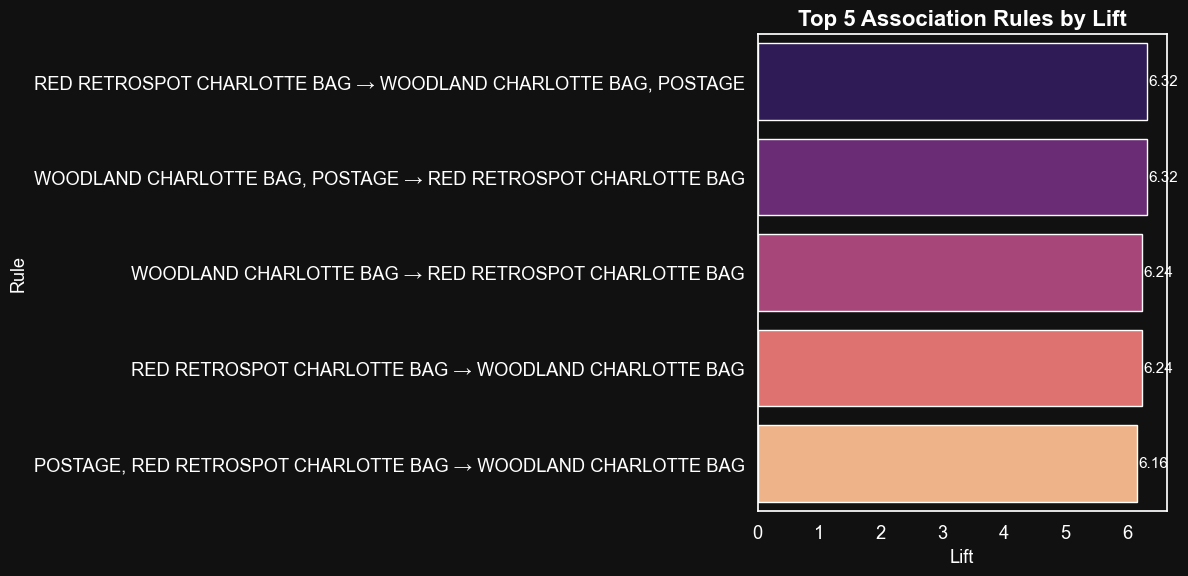

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark theme
sns.set_theme(style="dark", rc={
    'axes.facecolor': '#111111',
    'figure.facecolor': '#111111',
    'axes.edgecolor': 'white',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#333333',
    'font.family': 'sans-serif',
}, font_scale=1.2)

# Format rule labels
rules_sorted['Rule'] = rules_sorted['antecedents'].apply(lambda x: ', '.join(list(x))) + \
                       " → " + rules_sorted['consequents'].apply(lambda x: ', '.join(list(x)))

# Barplot of top rules by lift
plt.figure(figsize=(12, 6))
sns.barplot(
    x='lift', 
    y='Rule', 
    data=rules_sorted, 
    palette='magma'
)
plt.title('Top 5 Association Rules by Lift', fontsize=16, weight='bold')
plt.xlabel('Lift', fontsize=13)
plt.ylabel('Rule', fontsize=13)

# Add lift values
for i, row in enumerate(rules_sorted.itertuples()):
    plt.text(row.lift + 0.02, i, f"{row.lift:.2f}", color='white', va='center', fontsize=11)

plt.tight_layout()
plt.show()


## Support Vs Confidence 

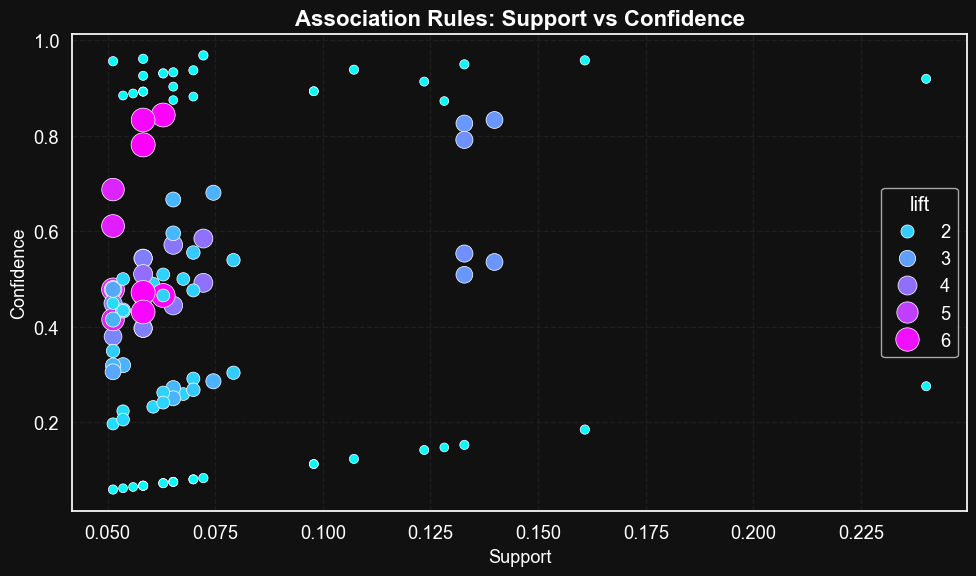

In [56]:
# Scatter plot of all rules
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='support', 
    y='confidence', 
    size='lift', 
    sizes=(40, 300), 
    hue='lift', 
    palette='cool', 
    data=rules,
    legend='brief'
)

plt.title('Association Rules: Support vs Confidence', fontsize=16, weight='bold')
plt.xlabel('Support', fontsize=13)
plt.ylabel('Confidence', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


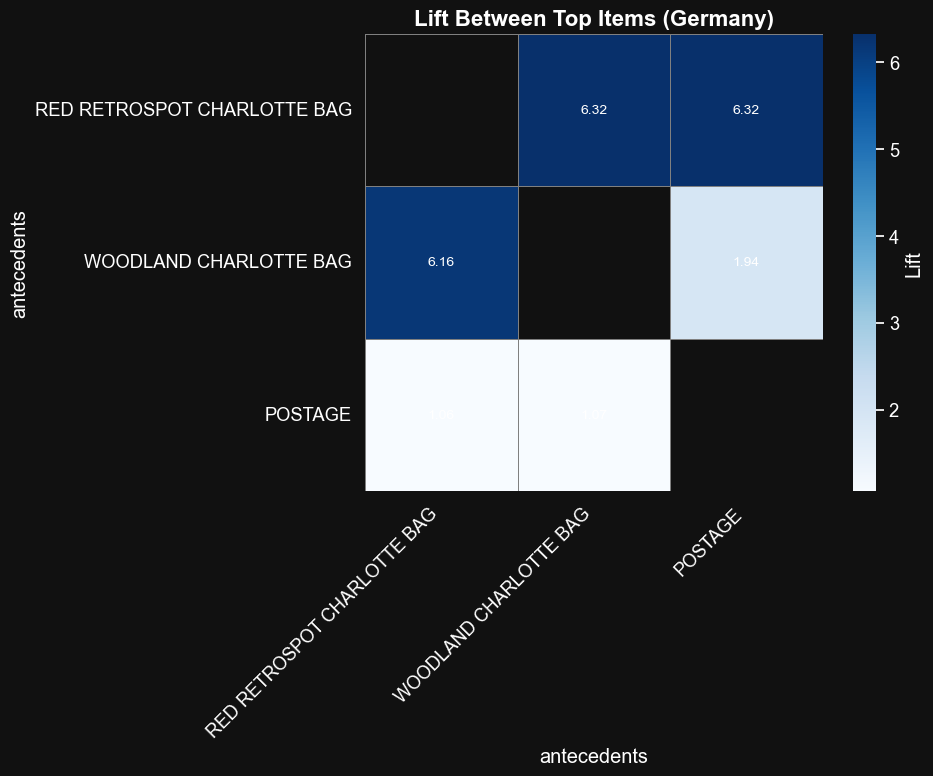

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    lift_matrix,
    annot=True,
    fmt=".2f",
    cmap='Blues',              # Updated color palette
    cbar_kws={'label': 'Lift'},
    linewidths=0.5,
    linecolor='gray',
    square=True,
    mask=lift_matrix.isnull(),
    annot_kws={"color": "white", "fontsize": 10}  # White text for dark bg
)

plt.title('Lift Between Top Items (Germany)', fontsize=16, weight='bold', color='white')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Lift Vs Confidence

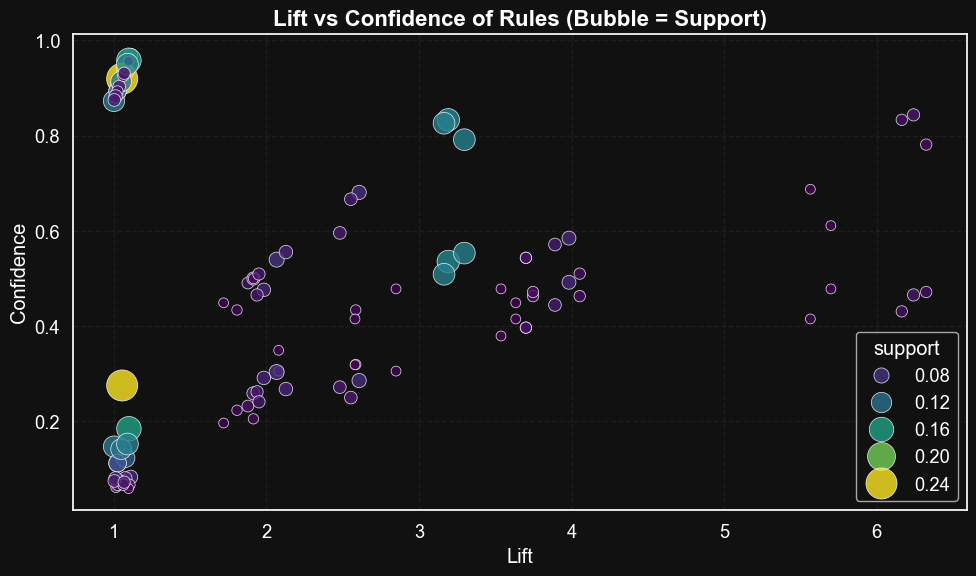

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rules, 
    x='lift', 
    y='confidence', 
    size='support', 
    hue='support', 
    sizes=(50, 500), 
    palette='viridis', 
    alpha=0.8,
    edgecolor='white'
)

plt.title('Lift vs Confidence of Rules (Bubble = Support)', fontsize=16, weight='bold')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Classification Models

To predict customer behavior, we implemented three classification algorithms: **Decision Tree**, **Naive Bayes**, and **K-Nearest Neighbors (KNN)**. The target variable was a binary indicator of high vs. low spenders, derived from total spending data. The dataset was split into a 70-30 train-test ratio, and performance was evaluated using accuracy, precision, recall, F1-score, and confusion matrices.



In [77]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [79]:
X = ml_df[['TotalSpend', 'Frequency', 'AvgQuantity']]
y = ml_df['HighSpender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standard Scaling
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.transform(X_train)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}


In [81]:
# Inside your model evaluation loop:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

results_df = pd.DataFrame(results)
display(results_df.round(3))

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,1.000,1.000,1.000,1.000
1,Naive Bayes,0.872,0.988,0.749,0.852
2,KNN,0.990,0.997,0.983,0.990


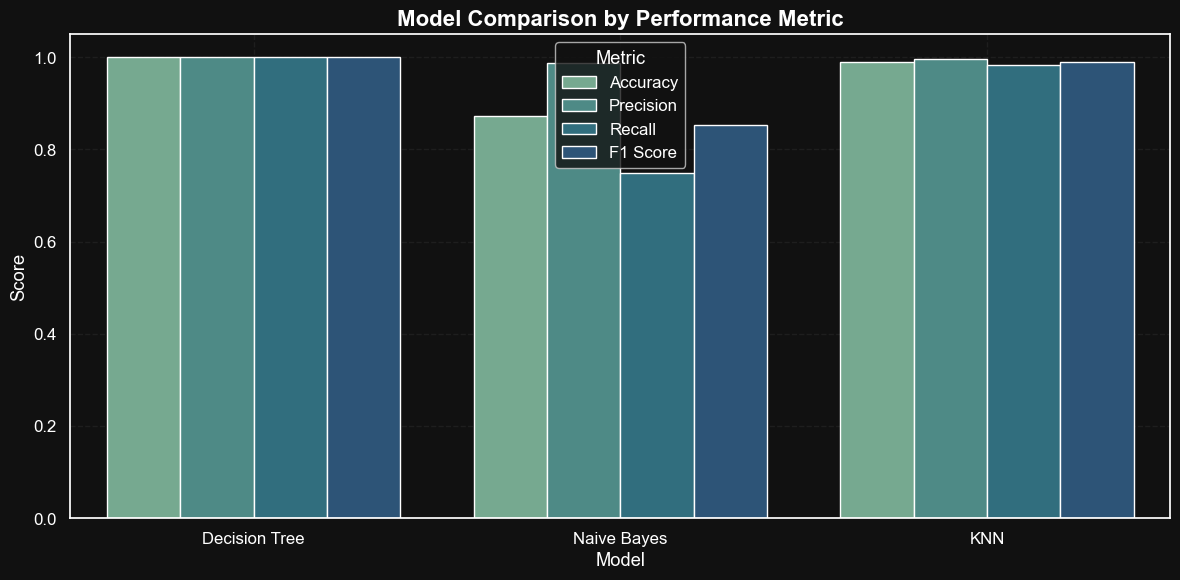

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark theme again for visuals
sns.set_theme(style="dark", rc={
    'axes.facecolor': '#111111',
    'figure.facecolor': '#111111',
    'axes.edgecolor': 'white',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#333333',
}, font_scale=1.1)

# Melt for seaborn
melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted, palette='crest')

plt.title('Model Comparison by Performance Metric', fontsize=16, weight='bold')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.legend(title='Metric')
plt.show()


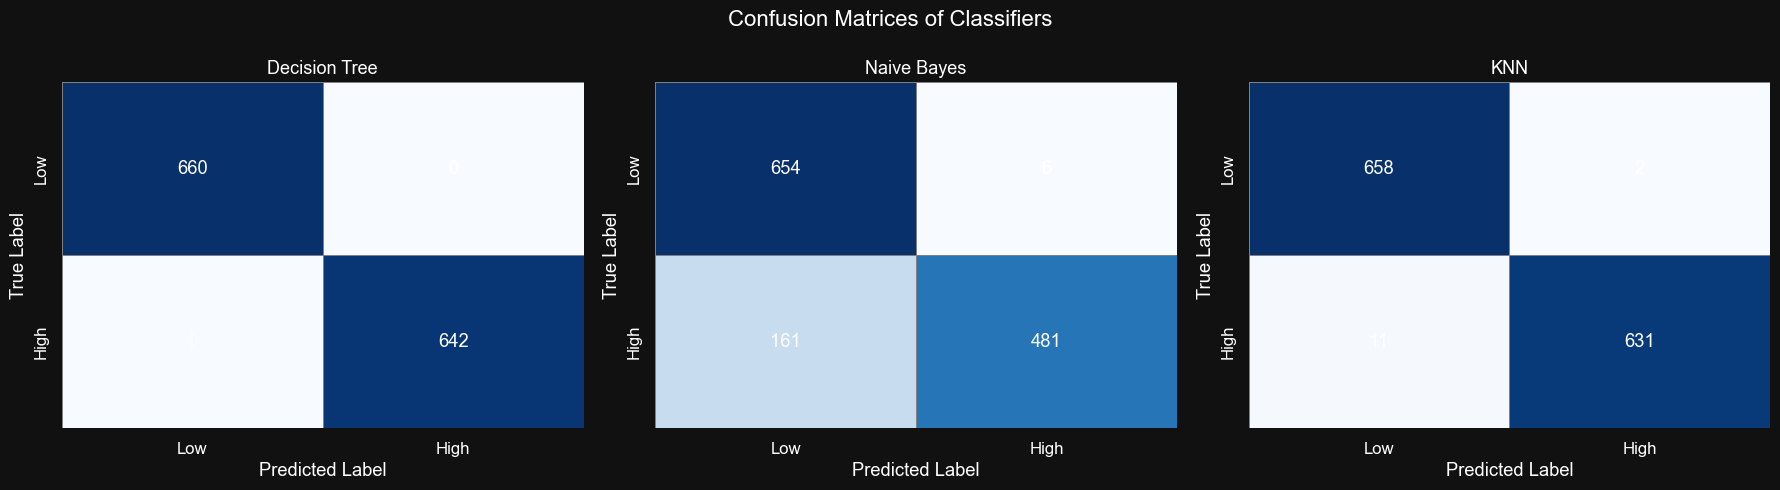

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5), facecolor='#111111')

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['Low', 'High'], yticklabels=['Low', 'High'],
                linewidths=0.5, linecolor='gray', annot_kws={"color": "white"})

    ax.set_title(name, color='white', fontsize=13)
    ax.set_xlabel('Predicted Label', color='white')
    ax.set_ylabel('True Label', color='white')
    ax.set_facecolor('#111111')
    ax.tick_params(colors='white')

plt.suptitle("Confusion Matrices of Classifiers", fontsize=16, color='white')
plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_17064\2247787346.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], color='white')


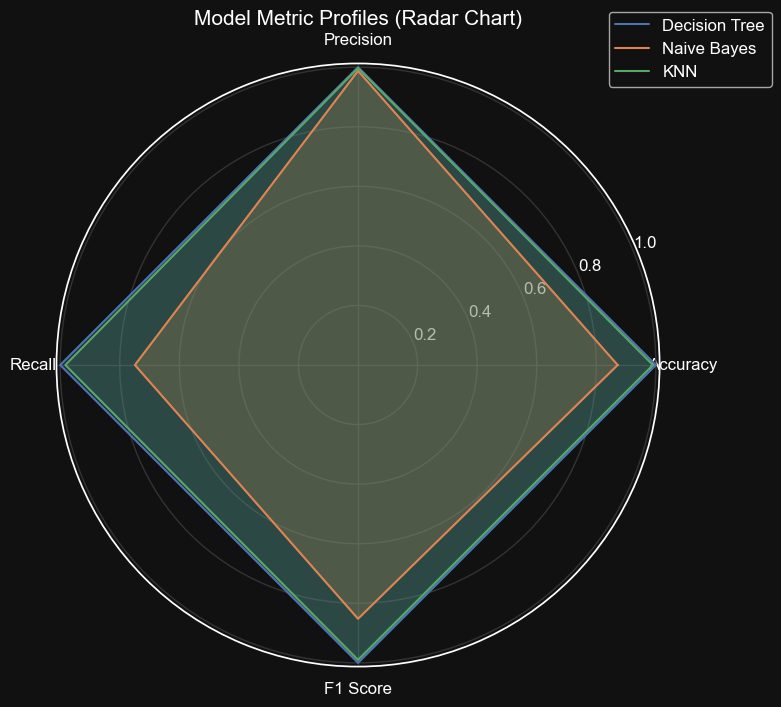

In [87]:
from math import pi

# Prepare data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
radar_df = results_df.set_index('Model')[metrics]

# Radar requires rows to be circular
radar_df = pd.concat([radar_df, radar_df.iloc[:, :1]], axis=1)

# Angles for each axis
angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
angles += angles[:1]  # complete the loop

# Plot
plt.figure(figsize=(8, 8), facecolor='#111111')
ax = plt.subplot(111, polar=True)
ax.set_facecolor('#111111')

for idx, row in radar_df.iterrows():
    values = row.tolist()
    ax.plot(angles, values, label=idx)
    ax.fill(angles, values, alpha=0.25)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, color='white')
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], color='white')
ax.set_title("Model Metric Profiles (Radar Chart)", color='white', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


## Clustering: Customer Segmentation
In this step, we segment customers into distinct groups using the K-Means clustering algorithm. We engineer relevant features like Total Spend, Purchase Frequency, and Average Quantity per Transaction, normalize them, and identify optimal clusters using the Elbow Method. The resulting clusters can help businesses target groups like Frequent Big Spenders or Occasional Low Spenders more effectively.

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [32]:
# Standard Scaling 
X_cluster = ml_df[['TotalSpend', 'Frequency', 'AvgQuantity']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

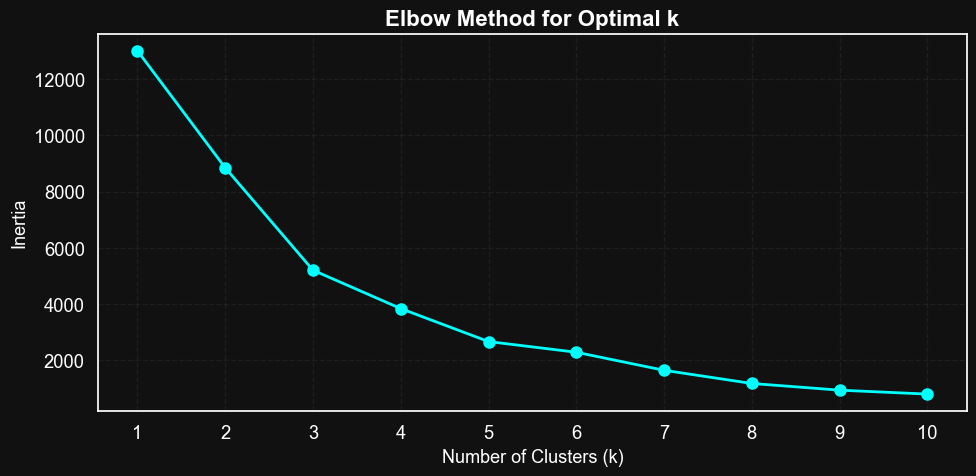

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Set dark theme
sns.set_theme(style="dark", rc={
    'axes.facecolor': '#111111',
    'figure.facecolor': '#111111',
    'axes.edgecolor': 'white',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#333333',
    'font.family': 'sans-serif',
}, font_scale=1.2)

# Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-', linewidth=2, markersize=8, color='cyan')
plt.title('Elbow Method for Optimal k', fontsize=16, weight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(k_range)
plt.tight_layout()
plt.show()


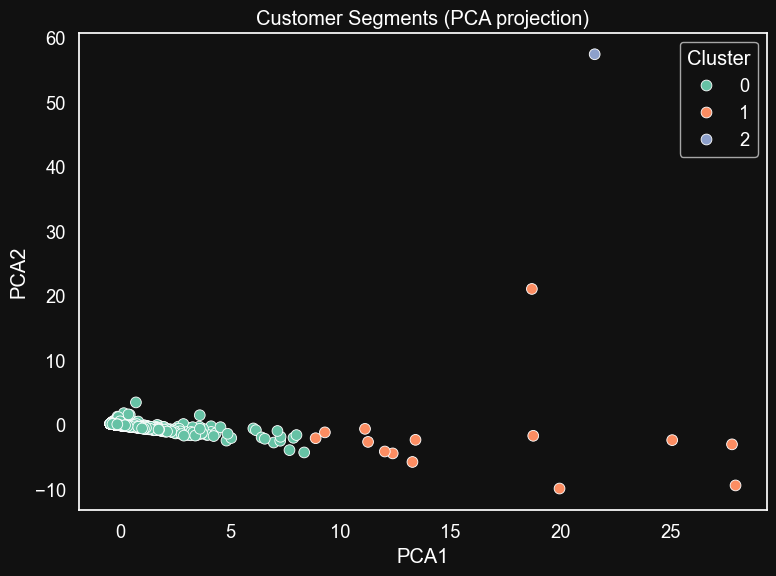

Silhouette Score: 0.96


In [38]:
# Fit KMeans
optimal_k =  3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
ml_df['Cluster'] = kmeans.fit_predict(X_scaled)

# --- Visualization using PCA ---
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
ml_df['PCA1'] = components[:, 0]
ml_df['PCA2'] = components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=ml_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Customer Segments (PCA projection)')
plt.tight_layout()
plt.show()

# Silhoutte Score
score = silhouette_score(X_scaled, ml_df['Cluster'])
print(f'Silhouette Score: {score:.2f}')

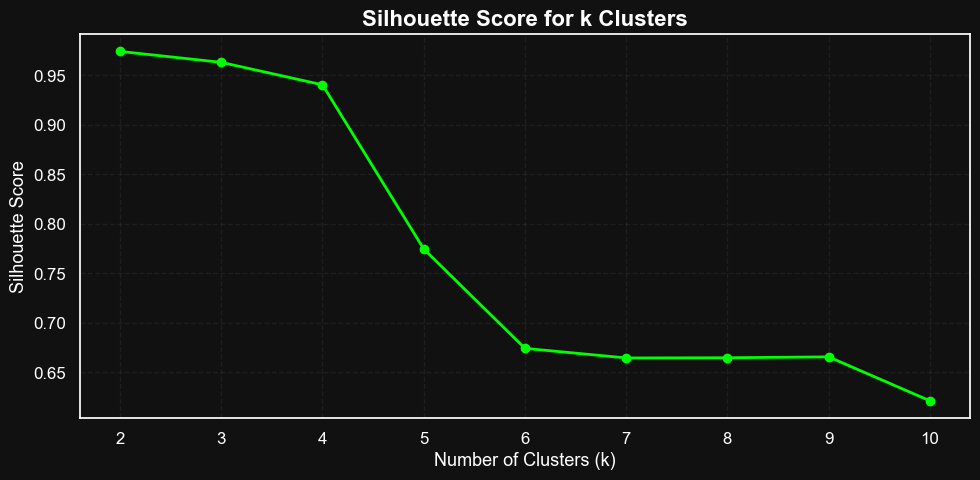

In [97]:
# Silhouette scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='lime', linewidth=2)
plt.title('Silhouette Score for k Clusters', fontsize=16, weight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=13)
plt.ylabel('Silhouette Score', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(range(2, 11))
plt.tight_layout()
plt.show()


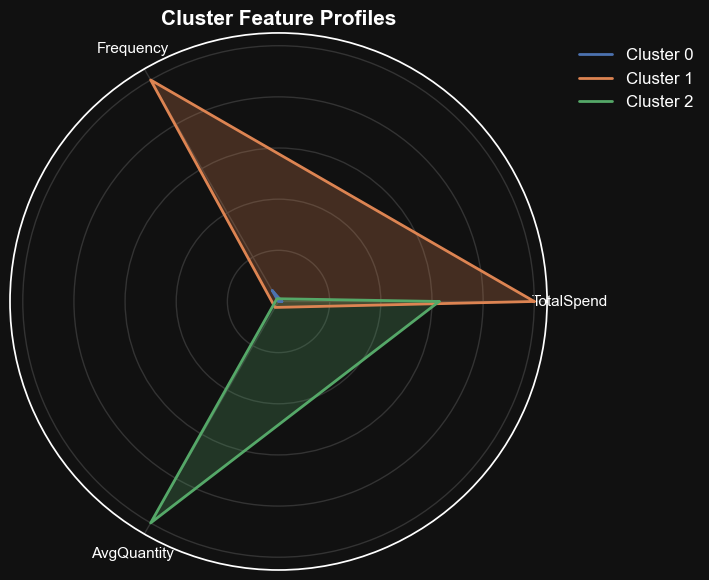

In [101]:
import numpy as np

# Assign clusters
ml_df['Cluster'] = clusters

# Compute average feature values per cluster
cluster_means = ml_df.groupby('Cluster')[['TotalSpend', 'Frequency', 'AvgQuantity']].mean()

# Normalize for comparison
cluster_means_norm = cluster_means / cluster_means.max()

# Radar chart setup
labels = cluster_means_norm.columns.tolist()
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Set dark background
plt.figure(figsize=(8, 6), facecolor='#111111')
ax = plt.subplot(111, polar=True, facecolor='#111111')

# Plot each cluster
for i, row in cluster_means_norm.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, label=f'Cluster {i}', linewidth=2)
    ax.fill(angles, values, alpha=0.25)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color='white', fontsize=11)
ax.set_yticklabels([])  # Hide radial labels
ax.spines['polar'].set_color('white')
ax.tick_params(colors='white')
ax.set_title('Cluster Feature Profiles', color='white', fontsize=15, weight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1), frameon=False)

plt.tight_layout()
plt.show()


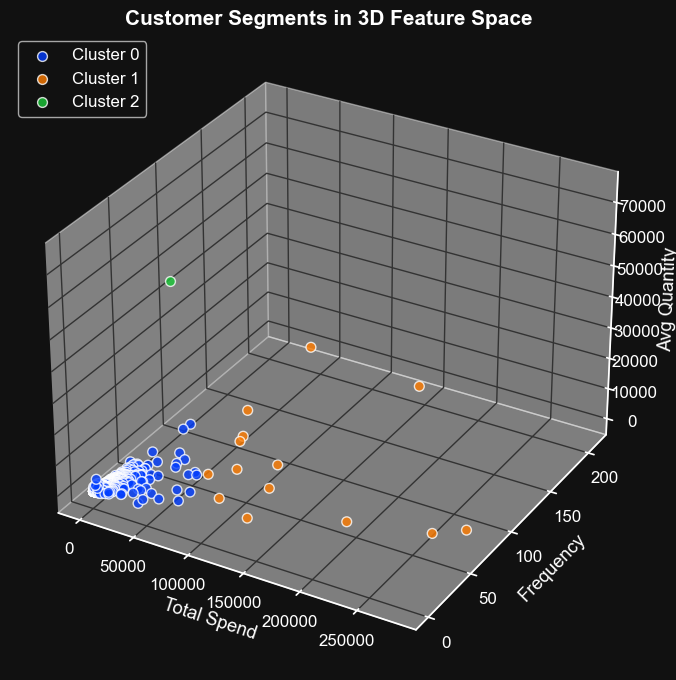

In [103]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Setup 3D plot
fig = plt.figure(figsize=(10, 7), facecolor='#111111')
ax = fig.add_subplot(111, projection='3d', facecolor='#111111')

# Assign final clusters again if needed
ml_df['Cluster'] = clusters
colors = sns.color_palette("bright", np.unique(clusters).shape[0])

# Scatter plot
for i, color in zip(np.unique(clusters), colors):
    cluster_data = ml_df[ml_df['Cluster'] == i]
    ax.scatter(
        cluster_data['TotalSpend'], 
        cluster_data['Frequency'], 
        cluster_data['AvgQuantity'],
        s=50,
        label=f'Cluster {i}',
        color=color,
        edgecolors='white',
        alpha=0.8
    )

# Set labels and aesthetics
ax.set_xlabel('Total Spend', color='white')
ax.set_ylabel('Frequency', color='white')
ax.set_zlabel('Avg Quantity', color='white')
ax.set_title('Customer Segments in 3D Feature Space', color='white', fontsize=15, weight='bold')
ax.tick_params(colors='white')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


## 📌 8. Insights & Business Recommendations

Based on our data analysis and modeling, we derive the following actionable insights for the business:

- **Bundling Products:**  
  Association Rule Mining revealed strong co-occurrence between specific product pairs (e.g., *Paper Craft Kits* and *Ribbon Set*). These items are often purchased together — introducing **bundle discounts** could increase cart sizes.

- **High Spenders Tend to Shop Midweek:**  
  Analysis of `HighSpender` behavior showed a peak in purchases around **Wednesdays and Thursdays**. A targeted **midweek loyalty campaign** can reinforce this spending behavior.

- **Cluster-Based Segmentation:**  
  K-Means clustering identified groups such as:
  - **Cluster 0**: Frequent low-spending customers — target for **upselling or bulk-buy promotions**.
  - **Cluster 1**: Infrequent but high-spending customers — ideal for **exclusive offers** or early access.
  - **Cluster 2**: Average in both frequency and spending — potential for **personalized nudges**.

- **Country-Based Tailoring:**  
  While UK dominated the dataset, countries like **Germany** and **France** showed distinct patterns — e.g., fewer but larger purchases. A **localized pricing or shipping strategy** might improve retention.

---

## ⚠️ 9. Challenges & Reflections

Working with real-world data presented several challenges:

- **Data Quality Issues**:  
  Duplicate rows and missing customer IDs needed to be cleaned. Some transactions had negative quantities (likely returns), which required filtering.

- **Sparse Matrix for Association Rules**:  
  One-hot encoded transaction matrix became large and memory-intensive, making rule mining computationally expensive.

- **Imbalanced Target Classes**:  
  For classification, the `HighSpender` target had a skewed distribution — we mitigated this using **median-based binarization** and carefully chosen metrics like F1-Score.

- **Memory Constraints**:  
  Operations like creating large pivot tables or calculating distances in high-dimensional space pushed the limits of available RAM. We handled this by aggregating data efficiently and applying PCA for dimensionality reduction.

---

## ✅ 10. Conclusion

This analysis provided an end-to-end pipeline from **data cleaning**, **EDA**, **feature engineering**, **modeling**, and finally **insight generation**. Through association rule mining, classification models, and clustering, we uncovered meaningful patterns in consumer behavior.

If implemented, the business can benefit from:
- **Product bundling strategies**
- **Targeted campaigns** based on customer type and spend behavior
- **Data-driven customer segmentation** for personalization

With further refinement and integration of external data (e.g., time of day, promotions), these strategies could be even more impactful.
